<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - Version CV2
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

### Jalon

Date limite 07/08/2022

### Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

### Livrables

Une présentation type "Powerpoint", faisant office de veille.
Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: blue;" >

# 2.Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import getcwd
from os.path import join
from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False

# Récupère le répertoire du programme
file_path = getcwd() + "\\"

print(f"Current execution path : {file_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\


In [3]:
source_data_path = join(file_path,"dataset")
training_data_path = join(source_data_path, "training_set")
validation_data_path = join(source_data_path, "validation_set")
print("Source path :", source_data_path)
print("Training path :", training_data_path)
print("validation path :", validation_data_path)

Source path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset
Training path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\training_set
validation path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\validation_set


In [4]:
image_size = (180, 180)
batch_size = 32
labels = ['cat', 'dog']

<div style="display: flex; background-color: blue;" >

# 3.Avec CV2
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Chargemement des images
</div>

In [5]:
train = get_cv2_data(training_data_path, labels=labels, verbose=verbose)
val = get_cv2_data(validation_data_path, labels=labels, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Visualisation
</div>

In [6]:
def show_data(labels, train=None, val=None, verbose=0):
    l = []
    if train is not None:
        for i in train:
            l.append("train_"+labels[i[1]])
    if val is not None:
        for i in val:
            l.append("val_"+labels[i[1]])
    
    sns.set_style('darkgrid')
    sns.countplot(x=l)  

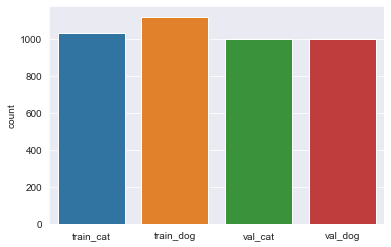

In [7]:
show_data(labels=labels, train=train, val=val, verbose=verbose)

Text(0.5, 1.0, 'dog')

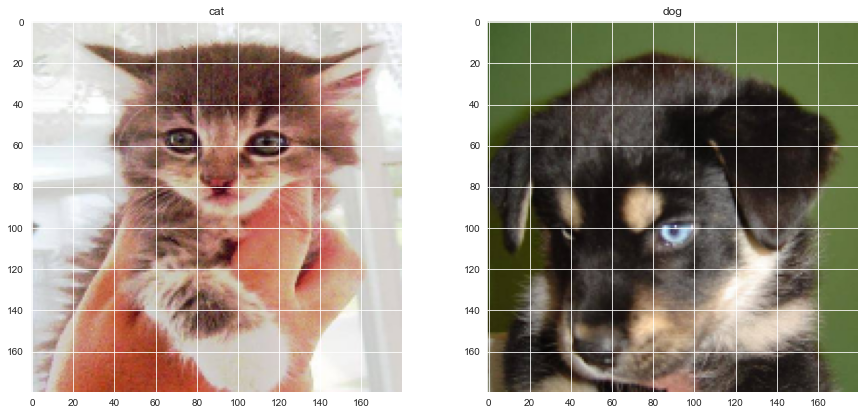

In [8]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.subplot(2, 2, 2)
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

<div style="display: flex; background-color: Green; padding: 7px;" >

### Data Preprocessing and Data Augmentation
</div>

<div style="display: flex; background-color: indigo;" >

#### Standardisation
</div>

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, image_size[0], image_size[1], 1)
y_train = np.array(y_train)

x_val.reshape(-1, image_size[0], image_size[1], 1)
y_val = np.array(y_val)

<div style="display: flex; background-color: indigo;" >

#### Augmentation
</div>

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Define the Model
</div>

In [26]:
image_size = (180, 180)
batch_size = 32

train_datgen=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set=train_datgen.flow_from_directory(training_data_path,
                                              target_size=(64,64),batch_size=32,class_mode='binary')
validation_set=train_datgen.flow_from_directory(validation_data_path,
                                              target_size=(64,64),batch_size=32,class_mode='binary')

Found 2148 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [46]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [27]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[image_size[0], image_size[1],3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 59168)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [33]:
opt = Adam(learning_rate=0.000001)
#model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
cnn.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [34]:
epochs = 5
history = cnn.fit(training_set, epochs = epochs , validation_data=validation_set)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/flatten_4/Reshape' defined at (most recent call last):
    File "C:\Program Files\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Program Files\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Program Files\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\kernelbase.py", line 508, in dispatch_queue
      await self.process_one()
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\kernelbase.py", line 497, in process_one
      await dispatch(*args)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\kernelbase.py", line 404, in dispatch_shell
      await result
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\kernelbase.py", line 728, in execute_request
      reply_content = await reply_content
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_21708\1126205718.py", line 2, in <cell line: 2>
      history = cnn.fit(training_set, epochs = epochs , validation_data=validation_set)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\layers\reshaping\flatten.py", line 98, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_4/flatten_4/Reshape'
Input to reshape is a tensor with 200704 values, but the requested shape requires a multiple of 59168
	 [[{{node sequential_4/flatten_4/Reshape}}]] [Op:__inference_train_function_3468]

In [25]:
epochs = 5
history = cnn.fit(x_train,y_train, epochs = epochs , validation_data = (x_val, y_val))

Epoch 1/5


ValueError: in user code:

    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\losses.py", line 2367, in get
        return deserialize(identifier)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_Crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [14]:
model = Sequential()
model.add(Conv2D(batch_size, 2,padding="same", activation="relu", input_shape=(image_size[0], image_size[1],3)))
model.add(MaxPool2D())

model.add(Conv2D(batch_size, 2, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(batch_size*2, 2, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(batch_size*4,activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4128      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)      

In [18]:
opt = Adam(learning_rate=0.000001)
#model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
model.compile(optimizer = opt , loss = "binary_Crossentropy" , metrics = ['accuracy'])

In [19]:
epochs = 5
history = model.fit(x_train,y_train, epochs = epochs , validation_data = (x_val, y_val))

Epoch 1/5


ValueError: in user code:

    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\engine\compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\losses.py", line 2367, in get
        return deserialize(identifier)
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "c:\Program Files\Python_venv\tensor_flow\lib\site-packages\keras\utils\generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_Crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


<div style="display: flex; background-color: Green; padding: 7px;" >

### Evaluating the result
</div>

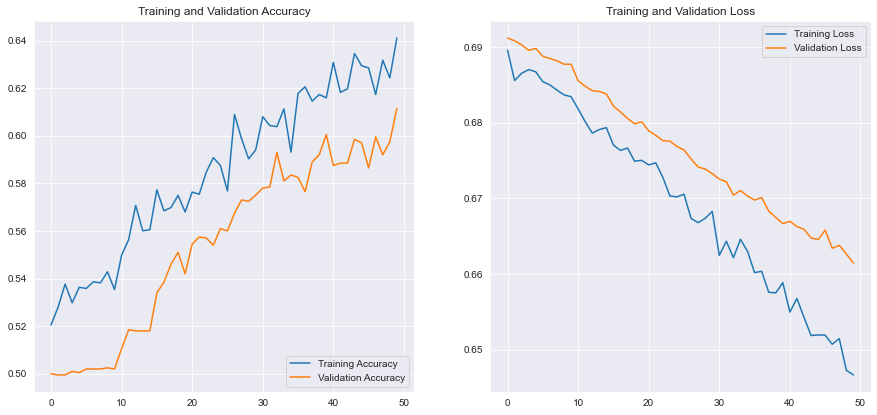

In [17]:
show_learning_graph(history=history, epochs=epochs, verbose=verbose)

<div style="display: flex; background-color: Green; padding: 7px;" >

### Test with validation data
</div>

In [24]:
predictions = model.predict(x_val)
predictions

63/63 [==============================] - 9s 146ms/step


array([[0.4488082 , 0.42749956],
       [0.417328  , 0.5088395 ],
       [0.47172242, 0.38936648],
       ...,
       [0.4541927 , 0.42238742],
       [0.4279539 , 0.40269837],
       [0.38880864, 0.46218938]], dtype=float32)

In [25]:
predictions_reshape = predictions.reshape(1,-1)[0]
predictions_reshape

array([0.4488082 , 0.42749956, 0.417328  , ..., 0.40269837, 0.38880864,
       0.46218938], dtype=float32)

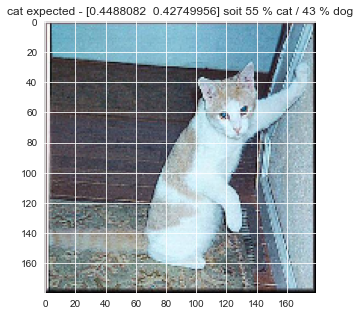

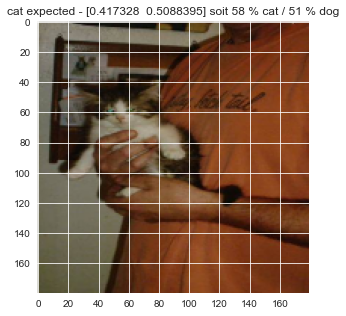

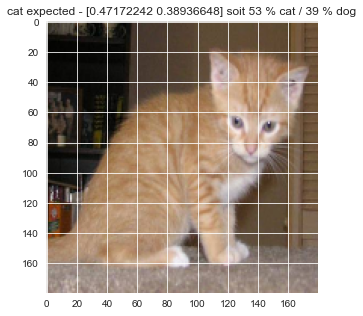

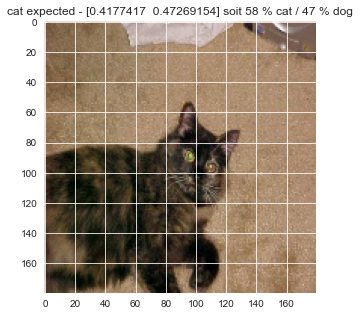

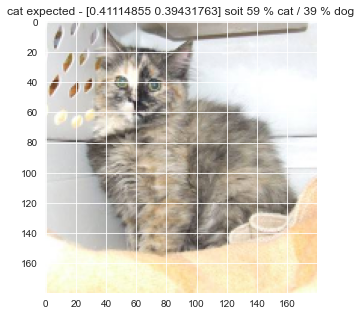

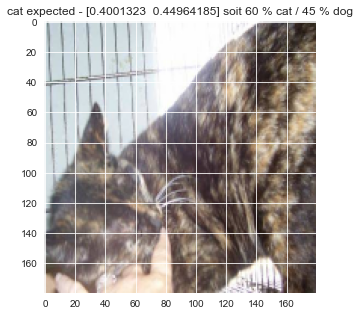

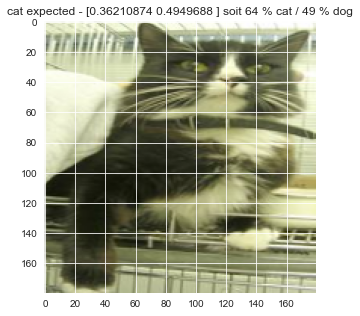

KeyboardInterrupt: 

<Figure size 360x360 with 0 Axes>

In [41]:
success = 0
fail = 0
fail_files = []
fail_predictions = []

for i in range(0, len(predictions)):
    score = predictions[i]
    
    res = 0
    if predictions[i][0] < predictions[i][1]:
        res = 1
    
    feature, label = val[i]

    if label == res:
        success += 1
    else:
        fail += 1
        fail_files.append(feature)
    plt.figure(figsize=(5, 5))
    plt.imshow(feature)
    plt.title(f"{labels[label]} expected - {predictions[i]}")
    # plt.title(f"{labels[label]} expected - {predictions[i]} soit {round(100 * (1 - predictions[i][0]))} % cat / {round(100 * predictions[i][1])} % dog")
    plt.show()
    # print(predictions)

In [30]:
for i in range(0, len(predictions)):
    score = predictions[i]
    # print(f'{predictions[i]}, expected : {labels[y_val[i]]}')
    print(f"- {round(100 * (1 - predictions[i][0]))} % cat / {round(100 * predictions[i][1])} % dog, expected : {labels[y_val[i]]}")
    # print(predictions)

- 55 % cat / 43 % dog, expected : cat
- 58 % cat / 51 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 58 % cat / 47 % dog, expected : cat
- 59 % cat / 39 % dog, expected : cat
- 60 % cat / 45 % dog, expected : cat
- 64 % cat / 49 % dog, expected : cat
- 58 % cat / 49 % dog, expected : cat
- 63 % cat / 50 % dog, expected : cat
- 56 % cat / 44 % dog, expected : cat
- 57 % cat / 37 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 56 % cat / 45 % dog, expected : cat
- 58 % cat / 38 % dog, expected : cat
- 58 % cat / 48 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 57 % cat / 46 % dog, expected : cat
- 52 % cat / 37 % dog, expected : cat
- 58 % cat / 44 % dog, expected : cat
- 56 % cat / 47 % dog, expected : cat
- 57 % cat / 42 % dog, expected : cat
- 55 % cat / 44 % dog, expected : cat
- 55 % cat / 47 % dog, expected : cat
- 63 % cat / 50 % dog, expected : cat
- 57 % cat / 46 % dog, expected : cat
- 57 % cat / 48 % dog, expected : cat
- 60 % cat /

In [27]:
print(classification_report(y_val, predictions, target_names = ['Cat (Class 0)','Dog (Class 1)']))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

<div style="display: flex; background-color: Green; padding: 7px;" >

### Test on new data
</div>

In [ ]:
def get_cv2_data(data_path, labels, image_size = (180, 180), filenames=None, verbose=0):
    data = [] 

    if filenames is None:
        filenames = get_dir_files(dir_path=data_path, include_sub_dir=1, verbose=verbose-1)

    if data_path is None:
        data_path = ""

    for f_name in filenames:

        try:
            img_arr = cv2.imread(join(data_path, f_name))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, image_size) # Reshaping images to preferred size
            
            # Affectation de la catégorie en se basant sur le nom du fichier
            cat = 0
            category=f_name.split('\\')[-1]
            category=category.split('.')[0]
            # On affecte le bon code de label
            for i in range(1, len(labels)):
                if labels[i] in category:
                    cat = i
                    break
            data.append([resized_arr, cat])
        except Exception as e:
            print(e)
    return np.array(data, dtype=object)

In [39]:
def get_aurelie_test():
    aurelie_test = [r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (23).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (75).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (113).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (115).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (473).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (702).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (719).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (808).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (825).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (902).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\cat_dog.001 (721).jpg',
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (1).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (16).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (18).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (32).jpg']

    aurelie_y = [1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,0, 0, 0, 0]
    return aurelie_test, aurelie_y 

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()

fail_predictions = []


for i in range(0, len(aurelie_test)):
    try:
        img = keras.preprocessing.image.load_img(aurelie_test[i], target_size=image_size)
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis

        predictions = cnn.predict(img_array)
        score = predictions[0]

        res = 0
        if (1-score) < score:
            res = 1

        feature, label = val[i]

        if label == res:
            success += 1
        else:
            print(predictions)
            fail += 1
            fail_files.append(feature)
            plt.figure(figsize=(5, 5))
            plt.imshow(feature)
            # plt.title(f"{labels[label]} expected - {predictions[i]}")
            # print(f"- {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.title(f"{labels[label]} expected - {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.show()
    except Exception as e:
        print(e)
   

1/1 [==============================] - 0s 32ms/step
[[0.999707]]


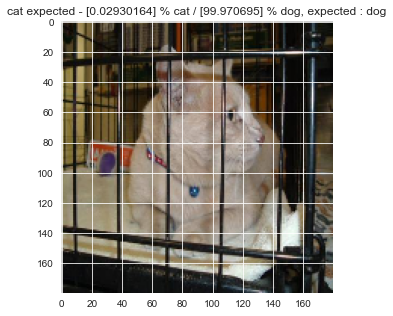

1/1 [==============================] - 0s 26ms/step
cannot identify image file <_io.BytesIO object at 0x000001FC97CF5C20>
1/1 [==============================] - 0s 33ms/step
[[0.70621616]]


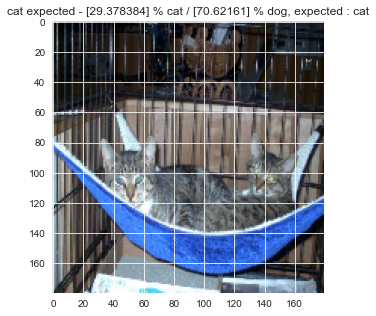

1/1 [==============================] - 0s 28ms/step


In [43]:
aurelie_test, aurelie_y = get_aurelie_test()

success = 0
fail = 0
fail_files = []
fail_predictions = []


for i in range(0, len(aurelie_test)):
    try:
        img = keras.preprocessing.image.load_img(aurelie_test[i], target_size=image_size)
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis

        predictions = cnn.predict(img_array)
        score = predictions[0]

        res = 0
        if (1-score) < score:
            res = 1

        feature, label = val[i]

        if label == res:
            success += 1
        else:
            print(predictions)
            fail += 1
            fail_files.append(feature)
            plt.figure(figsize=(5, 5))
            plt.imshow(feature)
            # plt.title(f"{labels[label]} expected - {predictions[i]}")
            # print(f"- {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.title(f"{labels[label]} expected - {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.show()
    except Exception as e:
        print(e)
   

In [ ]:
aurelie_val = get_cv2_data(data_path="",filenames=aurelie_test, labels=labels, verbose=verbose)

aurelie_predictions = model.predict_classes(aurelie_val)
aurelie_predictions = aurelie_predictions.reshape(1,-1)[0]
print(classification_report(aurelie_y, aurelie_predictions, target_names = ['Cat (Class 0)','Dog (Class 1)']))